In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from scipy.signal import convolve2d


(0.0, 150.0)

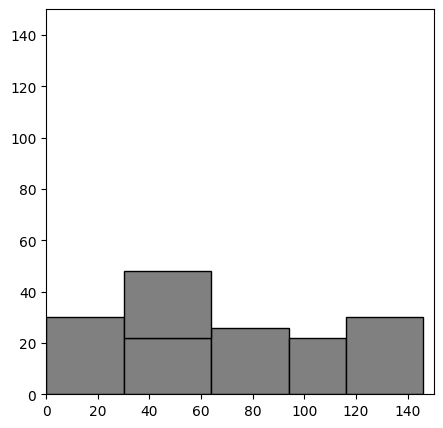

In [2]:
data = np.load('dataset_v1/bpp_' + str(0) + '.npy', allow_pickle=True)
data_list=data[1] # Packing Algorithm별 Trajectory
box_position_list = data_list[0]['box_position_list'] # x, y, w, h 리스트

bw,bh = 150, 150

test_box_position_list = box_position_list[0:6] ## 6개의 박스가 쌓인상황
# 위와같은 상황에서, 아래 박스를 쌓아야 한다고 해보자
new_boxsize_w, new_boxsize_h = box_position_list[6][2], box_position_list[6][3]


plt.figure(figsize=(5,5))
for i in range(len(test_box_position_list)):
    x,y,w,h = test_box_position_list[i]
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='k',facecolor='grey')
    plt.gca().add_patch(rect)
plt.xlim(0, bw)
plt.ylim(0, bh)


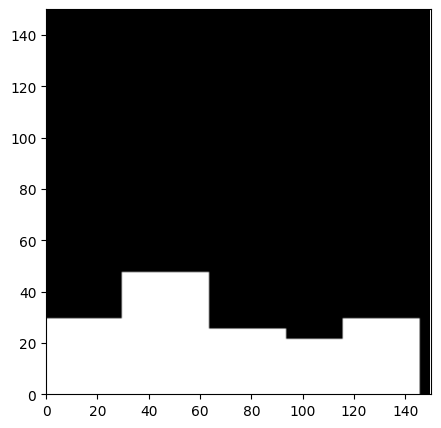

In [3]:
def collision_detect(box_position_list, bw, bh):
    array= np.zeros((bh, bw))
    for box in box_position_list:
        x, y, w, h = box
        array[y:y+h, x:x+w] += 1
    if np.max(array) > 1:
        print('COLLISSION DETECTED ::  Check your Algorithm')
        return False
    return array




array = collision_detect(test_box_position_list, bw, bh)

plt.figure(figsize=(5,5))
plt.xlim(0, bw)
plt.ylim(0, bh)
plt.imshow(array, cmap='gray')


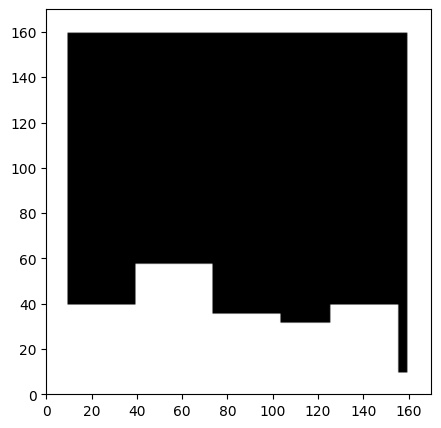

In [4]:


add_one_array = np.ones((bh+20, bw+20))
add_one_array[10:-10, 10:-10] = array
plt.figure(figsize=(5,5))
plt.xlim(0, add_one_array.shape[1])
plt.ylim(0, add_one_array.shape[0])
plt.imshow(add_one_array, cmap='gray')

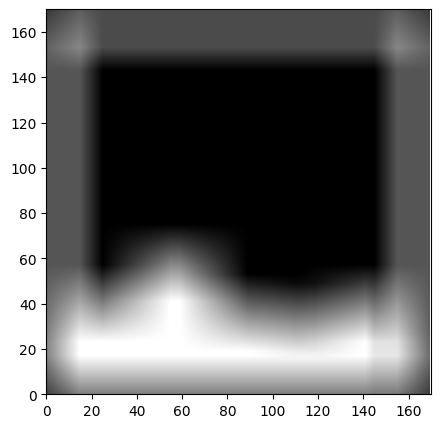

In [5]:
# convolution

w,h = int(new_boxsize_w), int(new_boxsize_h)
if w%2 != 0 or h%2 != 0:
    print('Box size should be even number')



kernel = np.ones((h,w))
conv = convolve2d(add_one_array, kernel, mode='same')
plt.figure(figsize=(5,5))
plt.xlim(0, conv.shape[1])
plt.ylim(0, conv.shape[0])
plt.imshow(conv, cmap='gray')


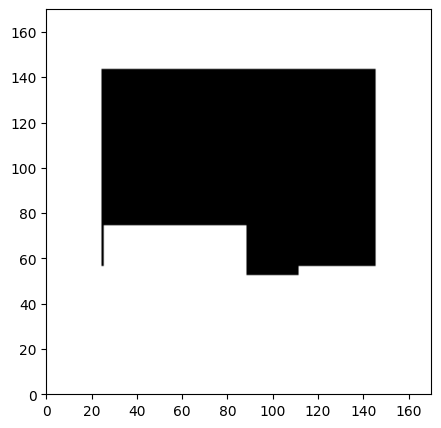

In [6]:
conv_result = (conv > 0).astype(np.float32)
plt.figure(figsize=(5,5))
plt.xlim(0, conv_result.shape[1])
plt.ylim(0, conv_result.shape[0])
plt.imshow(conv_result, cmap='gray')


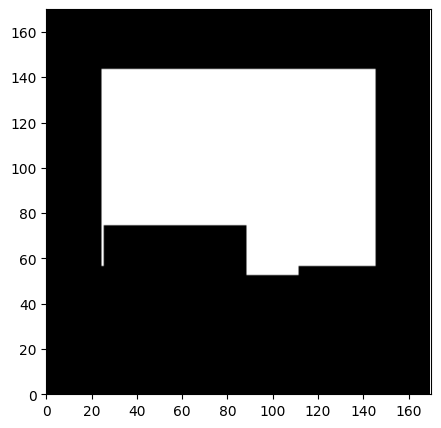

In [7]:
conv_result_flip = (conv_result==0).astype(np.float32)
plt.figure(figsize=(5,5))
plt.xlim(0, conv_result_flip.shape[1])
plt.ylim(0, conv_result_flip.shape[0])
plt.imshow(conv_result_flip, cmap='gray')

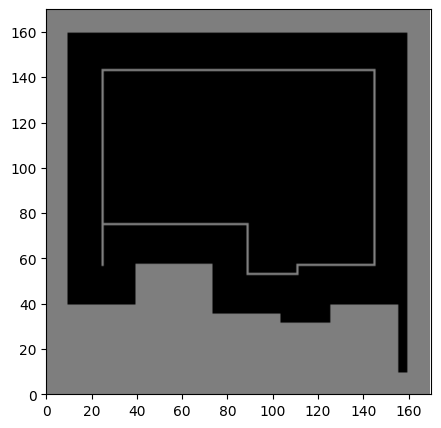

In [8]:
def find_boundary(exp_array):
    kernel = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])
    convolved = convolve2d(exp_array, kernel, mode='same', boundary='fill', fillvalue=0)
    boundary = (convolved > 0) & (exp_array == 0)

    return boundary


boundary = find_boundary(conv_result)

plt.figure(figsize=(5,5))   
plt.xlim(0, boundary.shape[1])
plt.ylim(0, boundary.shape[0])
plt.imshow(boundary, cmap='gray')
plt.imshow(add_one_array, cmap='gray', alpha=0.5)



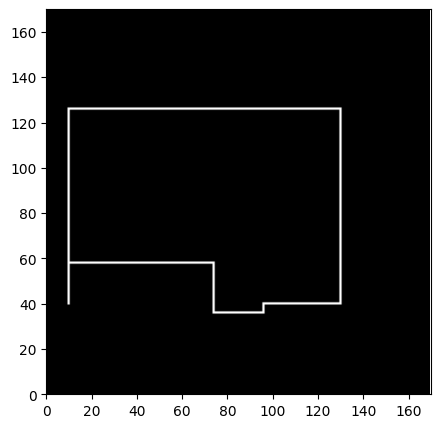

In [9]:
boundaries_x, boundaries_y = np.where(boundary > 0)
boundaries_x = boundaries_x - h//2
boundaries_y = boundaries_y - w//2

array_boundary = np.zeros((170, 170))
for x, y in zip(boundaries_x, boundaries_y):
    array_boundary[x, y] = 1


plt.figure(figsize=(5,5))
plt.xlim(0, array_boundary.shape[1])
plt.ylim(0, array_boundary.shape[0])
plt.imshow(array_boundary, cmap='gray')


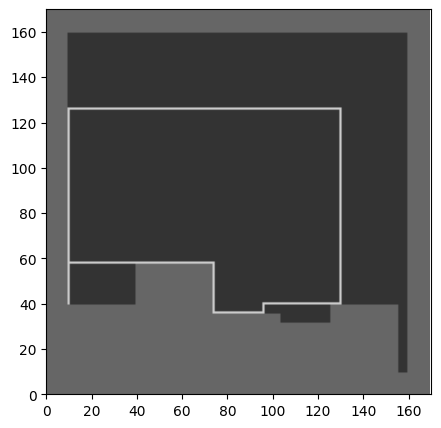

In [10]:
# add_one array랑 같이보면
plt.figure(figsize=(5,5))
plt.xlim(0, add_one_array.shape[1])
plt.ylim(0, add_one_array.shape[0])
plt.imshow(add_one_array, cmap='gray', alpha=0.5)
plt.imshow(array_boundary, cmap='gray', alpha=0.6)




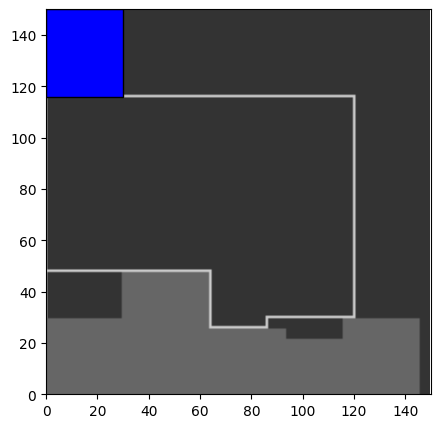

In [11]:
array_boundary_results = array_boundary[10:-10, 10:-10]
plt.figure(figsize=(5,5))
plt.xlim(0, array_boundary_results.shape[1])
plt.ylim(0, array_boundary_results.shape[0])

plt.imshow(array, cmap='gray', alpha=0.5)
plt.imshow(array_boundary_results, cmap='gray',alpha=0.6)

# box visualization
rect = patches.Rectangle((0,150-new_boxsize_h),new_boxsize_w,new_boxsize_h,linewidth=1,edgecolor='k',facecolor='b')
plt.gca().add_patch(rect)
